In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("./data/weight.csv")

# Look at the columns
print(df.columns)
print(df.head())
print(df.count())


Index(['Date', 'Weight'], dtype='object')
         Date  Weight
0  2015-05-22    79.8
1  2016-09-27    79.5
2  2020-03-12    74.5
3  2020-03-23    73.5
4  2020-03-30    73.0
Date      31
Weight    31
dtype: int64


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


Add smoothing

/var/folders/_x/xwgfzrxd5tb8jhbprlvlrtr40000gn/T/ipykernel_17281/2513750570.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


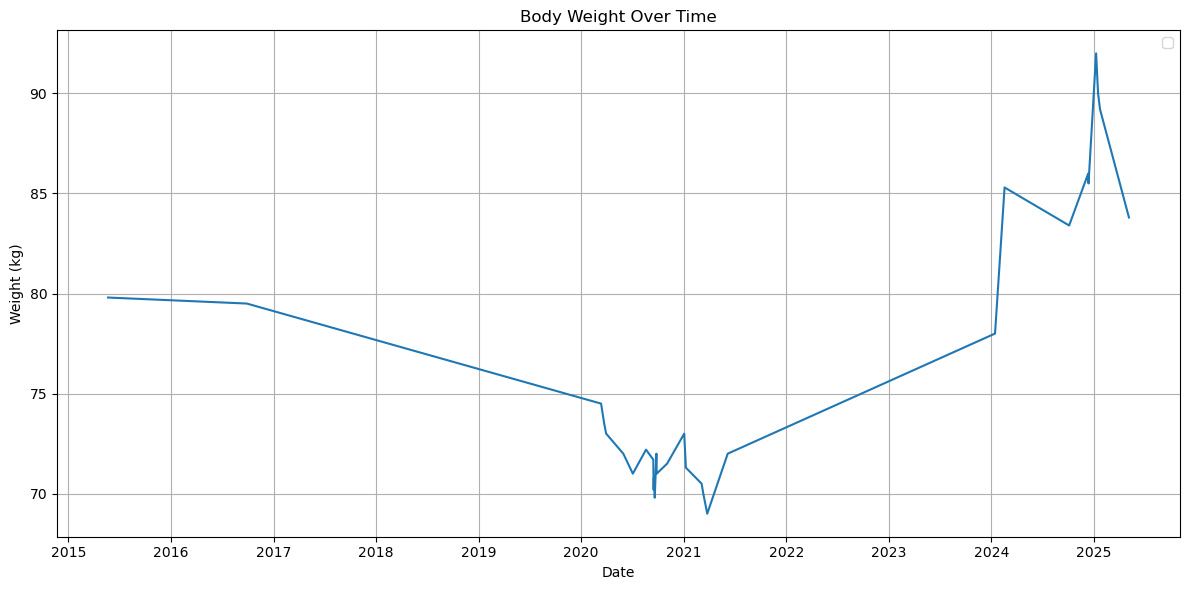

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Weight'])
plt.title("Body Weight Over Time")
plt.xlabel("Date")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Your existing DataFrame
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Convert dates to ordinal for fitting
x = df['date'].map(pd.Timestamp.toordinal)
y = df['weight']

# Apply LOWESS
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)  # frac controls smoothness

# Plot
plt.figure(figsize=(12,6))
plt.scatter(df['date'], df['weight'], alpha=0.5, label='Raw Weight')
plt.plot(pd.to_datetime(smoothed[:, 0]), smoothed[:, 1], color='blue', label='LOWESS Smoothed')
plt.title('Weight Over Time (LOWESS)')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
